# Classification of Epileptical Seizures from EEG signals

In [1]:
import tensorflow as tf
import numpy as np
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dense, Activation , LSTM , Dropout , AveragePooling3D
import pandas as pd

import matplotlib.pyplot as plt

# Data Preprocessing

In [2]:
df=pd.read_csv('data.csv')
df.head()


X=df.values
X=X[:,1:-1]
X = np.asarray(X).astype(np.float32)

In [3]:
X

array([[ 135.,  190.,  229., ..., -116.,  -83.,  -51.],
       [ 386.,  382.,  356., ...,  154.,  143.,  129.],
       [ -32.,  -39.,  -47., ...,  -35.,  -35.,  -36.],
       ...,
       [  14.,    6.,  -13., ...,   -2.,   -1.,   -8.],
       [ -40.,  -25.,   -9., ...,   68.,   59.,   55.],
       [  29.,   41.,   57., ...,   -2.,    2.,   20.]], dtype=float32)

In [4]:
from sklearn.model_selection import train_test_split


y=np.array(df['y'])
Y=np_utils.to_categorical(y)
Y.shape
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

In [5]:
X_train = X_train.reshape(-1,178,1)
X_test = X_test.reshape(-1,178,1)


X_train.shape
X_test.shape

(2300, 178, 1)

#  Intuition of the Epileptical Signal In the Dataset 

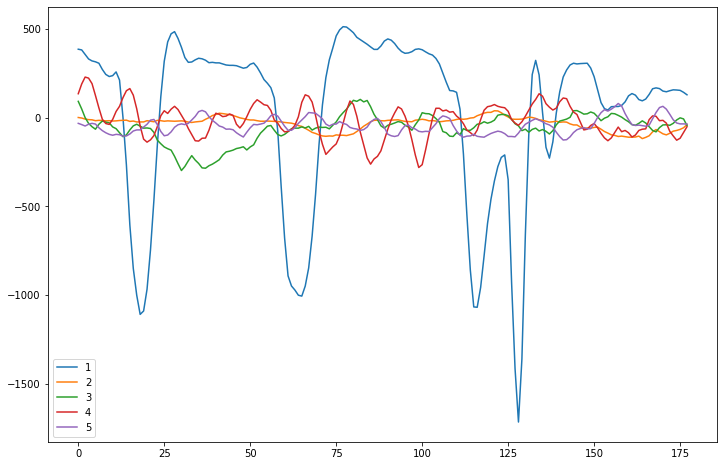

In [6]:
plt.figure(figsize=(12,8))
plt.plot(X[1,:],label='1')
plt.plot(X[7,:],label='2')
plt.plot(X[12,:],label='3')
plt.plot(X[0,:],label='4')
plt.plot(X[2,:],label='5')
plt.legend()
plt.show()

# Creating LSTM Neural Network For the Classification 

In [7]:
np.__version__

'1.18.5'

In [8]:
model = Sequential()
model.add(LSTM(56, input_shape=(45,1), return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(56))
model.add(Dropout(0.3))
model.add(Dense(20))
model.add(Activation('tanh'))
model.add(Dense(5))
model.add(Activation('softmax'))

model.summary()

2021-11-24 00:29:17.706101: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 45, 56)            12992     
                                                                 
 dropout (Dropout)           (None, 45, 56)            0         
                                                                 
 lstm_1 (LSTM)               (None, 56)                25312     
                                                                 
 dropout_1 (Dropout)         (None, 56)                0         
                                                                 
 dense (Dense)               (None, 20)                1140      
                                                                 
 activation (Activation)     (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 5)                 1

In [9]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
hist = model.fit(((X_train[:,::4]-X_train.mean())/X_train.std()),Y_train[:,1:],validation_data=((X_test[:,::4]-X_test.mean())/X_test.std(),Y_test[:,1:])
                ,epochs = 50, batch_size=15,shuffle=False
                )

Epoch 1/50
614/614 [==============================] - 39s 54ms/step - loss: 0.4148 - accuracy: 0.3900 - val_loss: 0.3909 - val_accuracy: 0.4196
Epoch 2/50
614/614 [==============================] - 32s 52ms/step - loss: 0.3764 - accuracy: 0.4499 - val_loss: 0.3779 - val_accuracy: 0.4722
Epoch 3/50
614/614 [==============================] - 32s 52ms/step - loss: 0.3434 - accuracy: 0.5270 - val_loss: 0.3007 - val_accuracy: 0.6196
Epoch 4/50
614/614 [==============================] - 30s 49ms/step - loss: 0.2896 - accuracy: 0.6162 - val_loss: 0.2608 - val_accuracy: 0.6626
Epoch 5/50
614/614 [==============================] - 38s 61ms/step - loss: 0.2603 - accuracy: 0.6534 - val_loss: 0.2474 - val_accuracy: 0.6778
Epoch 6/50
614/614 [==============================] - 35s 56ms/step - loss: 0.2485 - accuracy: 0.6674 - val_loss: 0.2355 - val_accuracy: 0.6943
Epoch 7/50
614/614 [==============================] - 36s 58ms/step - loss: 0.2421 - accuracy: 0.6755 - val_loss: 0.2339 - val_accuracy:

# Saving The Trained Model

In [11]:
model.save('Epilepsy.h5')